In [1]:
library('palmerpenguins')
library('tidymodels')
library('tidyverse')

theme_set(theme_grey(base_size = 14))

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.4     ✔ recipes      1.0.5
✔ dials        1.1.0     ✔ rsample      1.1.1
✔ dplyr        1.1.0     ✔ tibble       3.2.0
✔ ggplot2      3.4.1     ✔ tidyr        1.3.0
✔ infer        1.0.4     ✔ tune         1.0.1
✔ modeldata    1.1.0     ✔ workflows    1.1.3
✔ parsnip      1.0.4     ✔ workflowsets 1.0.0
✔ purrr        1.0.1     ✔ yardstick    1.1.0

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ purrr::discard() masks scales::discard()
✖ dplyr::filter()  masks stats::filter()
✖ dplyr::lag()     masks stats::lag()
✖ recipes::step()  masks stats::step()
• Search for functions across packages at https://www.tidymodels.org/find/

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ readr     2.1.4
✔ lubridate 1.9.2     ✔ stringr   1.5.0
── Conflicts ────────────────────────────────────────── tidyverse_conf

## Logistic regression model

In [2]:
penguins2 = penguins |> 
    filter(species %in% c('Adelie', 'Gentoo')) |>
    select(species, bill_length_mm) |>
    mutate(species = forcats::fct_drop(species)) |>
    drop_na()

penguins2 |> head()

species,bill_length_mm
<fct>,<dbl>
Adelie,39.1
Adelie,39.5
Adelie,40.3
Adelie,36.7
Adelie,39.3
Adelie,38.9


In [3]:
rec = recipe(species ~ bill_length_mm, data = penguins2) |>
    step_relevel(species, ref_level = 'Adelie')

rec



── Recipe ──────────────────────────────────────────────────────────────────────



── Inputs 

Number of variables by role

outcome:   1
predictor: 1



── Operations 

• Re-order factor level to ref_level for: species



In [4]:
rec_prepped  = prep(rec, penguins2) 

rec_prepped |> 
    juice() |>
    head()

bill_length_mm,species
<dbl>,<fct>
39.1,Adelie
39.5,Adelie
40.3,Adelie
36.7,Adelie
39.3,Adelie
38.9,Adelie


In [5]:
mod = logistic_reg() |> set_engine('glm')

In [7]:
mod_fit = mod |> fit(species ~ bill_length_mm, juice(rec_prepped))

tidy(mod_fit)

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),-52.41215,7.795216,-6.723630,1.772517e-11
bill_length_mm,1.21422,0.180998,6.708475,1.966693e-11


In [8]:
penguins2_with_pred = augment(mod_fit, juice(rec_prepped))

penguins2_with_pred |> head()

bill_length_mm,species,.pred_class,.pred_Adelie,.pred_Gentoo
<dbl>,<fct>,<fct>,<dbl>,<dbl>
39.1,Adelie,Adelie,0.9928689,0.0071311052
39.5,Adelie,Adelie,0.9884613,0.0115386850
40.3,Adelie,Adelie,0.9700863,0.0299137191
36.7,Adelie,Adelie,0.9996105,0.0003894983
39.3,Adelie,Adelie,0.9909266,0.0090734459
38.9,Adelie,Adelie,0.9943978,0.0056022081


In [18]:
penguins2 |> 
    mutate(species_numeric = as.numeric(species) - 1) |>
    filter(species == 'Adelie') |>
    head()

species,bill_length_mm,species_numeric
<fct>,<dbl>,<dbl>
Adelie,39.1,0
Adelie,39.5,0
Adelie,40.3,0
Adelie,36.7,0
Adelie,39.3,0
Adelie,38.9,0


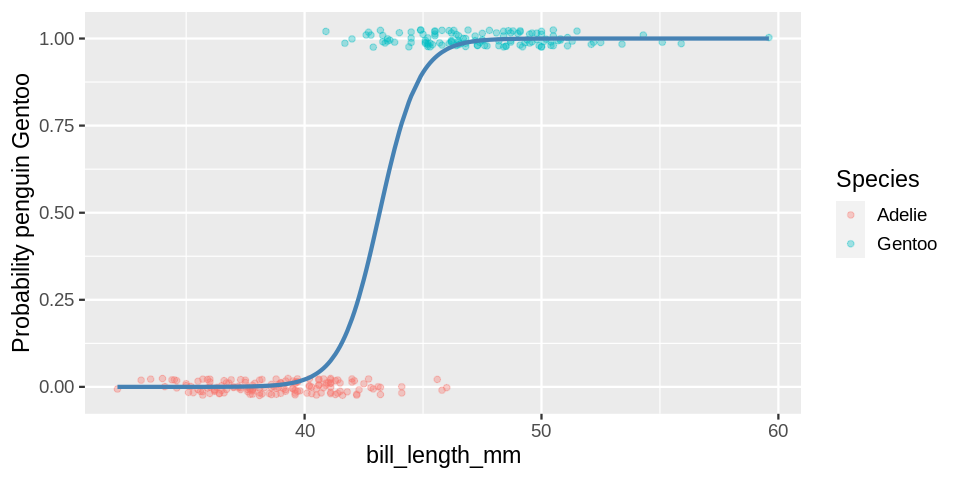

In [20]:
options(repr.plot.height = 4, repr.plot.width = 8)

ggplot(penguins2_with_pred) +
    geom_point(aes(x = bill_length_mm, y = as.numeric(species) - 1, color = species),
               alpha = 0.35,
               position = position_jitter(height = 0.025, width = 0)) +
    geom_line(aes(x = bill_length_mm, y = .pred_Gentoo), 
              color = 'steelblue', linewidth = 1.2) +
    labs(y = 'Probability penguin Gentoo', color = 'Species')